In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_excel("C:\\Users\\emanu\\Downloads\\youtube_statistics.xlsx")

In [7]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [9]:
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%H:%M:%S', errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  datetime64[ns]
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  datetime64[ns]
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [10]:
# Menghitung jumlah data kosong di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan jumlah data kosong
print("Jumlah data kosong per kolom:")
print(missing_values)

Jumlah data kosong per kolom:
trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64


In [11]:
df['description'] = df['description'].fillna('')
df.isnull().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

In [12]:
df.duplicated().sum()

4229

In [13]:
duplicated_rows = df[df.duplicated()]
print("Duplicated Rows:")

Duplicated Rows:


In [14]:
# Hitung duplikat persis (seluruh kolom sama)
df.duplicated().sum()

# Lihat contoh duplikatnya
dups = df[df.duplicated(keep=False)].sort_values(df.columns.tolist())
dups.head(10)


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
1571,2017-11-22,5th day IND vs SL 1st test: Shami gets angry o...,Headlines Sports,17,1900-01-01 11:05:20,"India vs Sri lanka 1st test|""day 5 ind vs sl""|...",311208,1305,448,103,False,False,False,"Mohammed Shami to Dickwella, no run, outside e...",7,570,85,2017-11-20
1684,2017-11-22,5th day IND vs SL 1st test: Shami gets angry o...,Headlines Sports,17,1900-01-01 11:05:20,"India vs Sri lanka 1st test|""day 5 ind vs sl""|...",311208,1305,448,103,False,False,False,"Mohammed Shami to Dickwella, no run, outside e...",7,570,85,2017-11-20
1542,2017-11-22,Aiyaary Sizzle | Neeraj Pandey | Sidharth Malh...,Reliance Entertainment,24,1900-01-01 11:00:47,"Neeraj Pandey|""Shital Bhatia""|""Friday Filmwork...",589413,5372,298,592,False,False,False,"Witness the story of two Indian Army officers,...",13,814,96,2017-11-18
1655,2017-11-22,Aiyaary Sizzle | Neeraj Pandey | Sidharth Malh...,Reliance Entertainment,24,1900-01-01 11:00:47,"Neeraj Pandey|""Shital Bhatia""|""Friday Filmwork...",589413,5372,298,592,False,False,False,"Witness the story of two Indian Army officers,...",13,814,96,2017-11-18
1569,2017-11-22,Ama Ghara Laxmi & Ranee | Maha Adhaya | Full E...,Tarang TV,24,1900-01-01 15:31:00,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",83316,250,62,18,False,False,False,Ama Ghara Laxmi: Monday-Saturday at 7 p.m. onl...,24,492,86,2017-11-20
1682,2017-11-22,Ama Ghara Laxmi & Ranee | Maha Adhaya | Full E...,Tarang TV,24,1900-01-01 15:31:00,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",83316,250,62,18,False,False,False,Ama Ghara Laxmi: Monday-Saturday at 7 p.m. onl...,24,492,86,2017-11-20
1555,2017-11-22,Arjun Reddy Full Video Songs | Madhurame Full ...,Mango Music,10,1900-01-01 11:30:19,"Arjun Reddy full video songs|""Madhurame Full V...",377982,4522,242,193,False,False,False,Arjun Reddy Full Video Songs on Mango Music. M...,20,1420,96,2017-11-19
1668,2017-11-22,Arjun Reddy Full Video Songs | Madhurame Full ...,Mango Music,10,1900-01-01 11:30:19,"Arjun Reddy full video songs|""Madhurame Full V...",377982,4522,242,193,False,False,False,Arjun Reddy Full Video Songs on Mango Music. M...,20,1420,96,2017-11-19
1544,2017-11-22,Benafsha Soonawalla ABUSES Hina Khan | Bigg Bo...,Lehren Small Screen,24,1900-01-01 12:48:22,"Bigg Boss 11|""Benafsha Soonawalla""|""Benafsha S...",279064,873,537,452,False,False,False,"In an Exclusive Interview with Lehren, Bigg Bo...",18,395,73,2017-11-20
1657,2017-11-22,Benafsha Soonawalla ABUSES Hina Khan | Bigg Bo...,Lehren Small Screen,24,1900-01-01 12:48:22,"Bigg Boss 11|""Benafsha Soonawalla""|""Benafsha S...",279064,873,537,452,False,False,False,"In an Exclusive Interview with Lehren, Bigg Bo...",18,395,73,2017-11-20


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
dups = df[df.duplicated(keep=False)].sort_values(df.columns.tolist())
dups.head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date


In [18]:
print("Jumlah baris dan kolom setelah pembersihan:", df.shape)
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

print("\nTipe data terbaru:")
print(df.dtypes)

Jumlah baris dan kolom setelah pembersihan: (32562, 18)

Jumlah missing value per kolom:
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

Tipe data terbaru:
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comme

In [19]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number, 'datetime64']).columns.tolist()

# --- Cetak hasilnya dengan format rapi ---
print("Kolom Numerik  :", numerical_cols)
print("Kolom Kategorik:", categorical_cols)
print("Kolom Datetime :", datetime_cols)

Kolom Numerik  : ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']
Kolom Kategorik: ['title', 'channel_title', 'tags', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']
Kolom Datetime : ['trending_date', 'publish_time', 'publish_date']


In [20]:
# Rasio like terhadap total interaksi (like + dislike)
df['like_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1)

# Rasio komentar terhadap views
df['comment_ratio'] = df['comment_count'] / (df['views'] + 1)

df[['like_ratio', 'comment_ratio']].head()

,like_ratio,comment_ratio
0,0.977017,0.000805
1,0.448171,0.000000
2,0.891796,0.000314
3,0.977424,0.002160
4,0.625954,0.000142


In [21]:
# Mengukur seberapa cepat video masuk ke trending sejak diunggah.
df['days_to_trend'] = (df['trending_date'] - df['publish_date']).dt.days
df['days_to_trend'].describe()


count    32562.00000
mean         2.11280
std          2.16911
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max        221.00000
Name: days_to_trend, dtype: float64

In [22]:
#Membuat fitur waktu tambahan agar bisa analisis pengaruh jam atau hari publikasi terhadap performa video.
df['publish_day'] = df['publish_date'].dt.day_name()
df['is_weekend'] = df['publish_day'].isin(['Saturday','Sunday']).astype(int)
df['publish_hour'] = df['publish_time'].dt.hour

df[['publish_day', 'is_weekend', 'publish_hour']].head()

,publish_day,is_weekend,publish_hour
0,Sunday,1,12
1,Monday,0,5
2,Sunday,1,15
3,Sunday,1,7
4,Monday,0,1


In [23]:
#Views per Like
df['views_per_like'] = df['views'] / (df['likes'] + 1)
df['views_per_like'].describe()


count    3.256200e+04
mean     6.115453e+03
std      7.202320e+04
min      2.618361e+00
25%      3.485326e+01
50%      1.053113e+02
75%      2.341569e+02
max      3.825489e+06
Name: views_per_like, dtype: float64

In [24]:
df[['views', 'likes', 'dislikes', 'comment_count',
    'like_ratio', 'comment_ratio', 'views_per_like', 'days_to_trend', 'is_weekend']].head()

,views,likes,dislikes,comment_count,like_ratio,comment_ratio,views_per_like,days_to_trend,is_weekend
0,1096327,33966,798,882,0.977017,0.000805,32.276239,2,1
1,590101,735,904,0,0.448171,0.000000,801.767663,1,0
2,473988,2011,243,149,0.891796,0.000314,235.580517,2,1
3,1242680,70353,1624,2684,0.977424,0.002160,17.663246,2,1
4,464015,492,293,66,0.625954,0.000142,941.206897,1,0


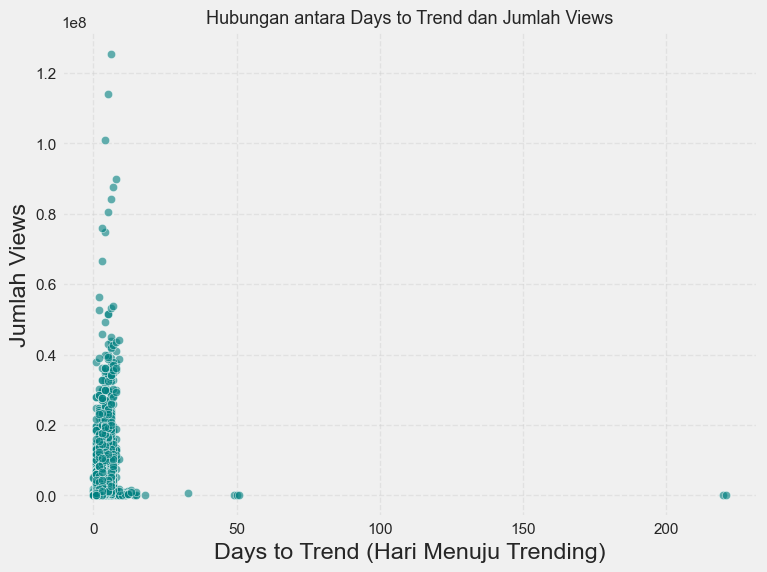

In [25]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='days_to_trend', y='views', data=df, alpha=0.6, color='teal')
plt.title('Hubungan antara Days to Trend dan Jumlah Views', fontsize=13)
plt.xlabel('Days to Trend (Hari Menuju Trending)')
plt.ylabel('Jumlah Views')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [26]:
fitur_model = [
    'likes','dislikes','comment_count','No_tags','desc_len','len_title',
    'category_id','like_ratio','days_to_trend','is_weekend','publish_hour',
]


target = 'views'

In [27]:
X=df[fitur_model]
y=df[target]

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
param_grid = {
    'n_estimators':[200,300],
    'max_depth':[10,20,None],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2]
}
gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                  cv=3, n_jobs=-1, scoring='r2')
gs.fit(X_train, y_train)
best = gs.best_estimator_
pred_best = best.predict(X_test)
print("Best params:", gs.best_params_)
print("Best RF  |  MAE:", mean_absolute_error(y_test, pred_best),
      " RMSE:", mean_squared_error(y_test, pred_best, squared=False),
      " R²:", r2_score(y_test, pred_best))

Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RF  |  MAE: 223662.3046535433  RMSE: 562009.1309542252  R²: 0.970076375961137


c:\Users\emanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


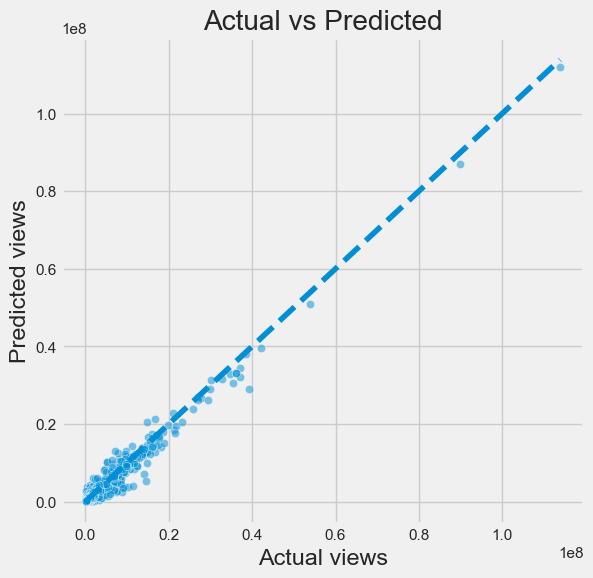

In [31]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=pred_best, alpha=0.5)
plt.xlabel("Actual views"); plt.ylabel("Predicted views"); plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], ls='--')
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
rf = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

In [39]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [40]:
# --- 5. Evaluasi kedua model ---
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

In [53]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

In [54]:
# Custom scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

In [55]:
# Models
rf = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=None,
    random_state=42
)
lr = LinearRegression()

# CV setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate RF
rf_cv = cross_validate(
    rf, X, y, cv=kf,
    scoring={'mse': mse_scorer, 'r2': r2_scorer},
    return_train_score=True
)

# Cross-validate LR
lr_cv = cross_validate(
    lr, X, y, cv=kf,
    scoring={'mse': mse_scorer, 'r2': r2_scorer},
    return_train_score=True
)


In [56]:
# Convert hasil ke DataFrame
def cv_results_to_df(cv_results, model_name):
    df = pd.DataFrame({
        "train_mse": -cv_results["train_mse"],
        "test_mse": -cv_results["test_mse"],
        "train_r2": cv_results["train_r2"],
        "test_r2": cv_results["test_r2"]
    })
    df["model"] = model_name
    df["fold"] = np.arange(1, len(df)+1)
    return df

rf_df = cv_results_to_df(rf_cv, "Random Forest")
lr_df = cv_results_to_df(lr_cv, "Linear Regression")

results_df = pd.concat([rf_df, lr_df])


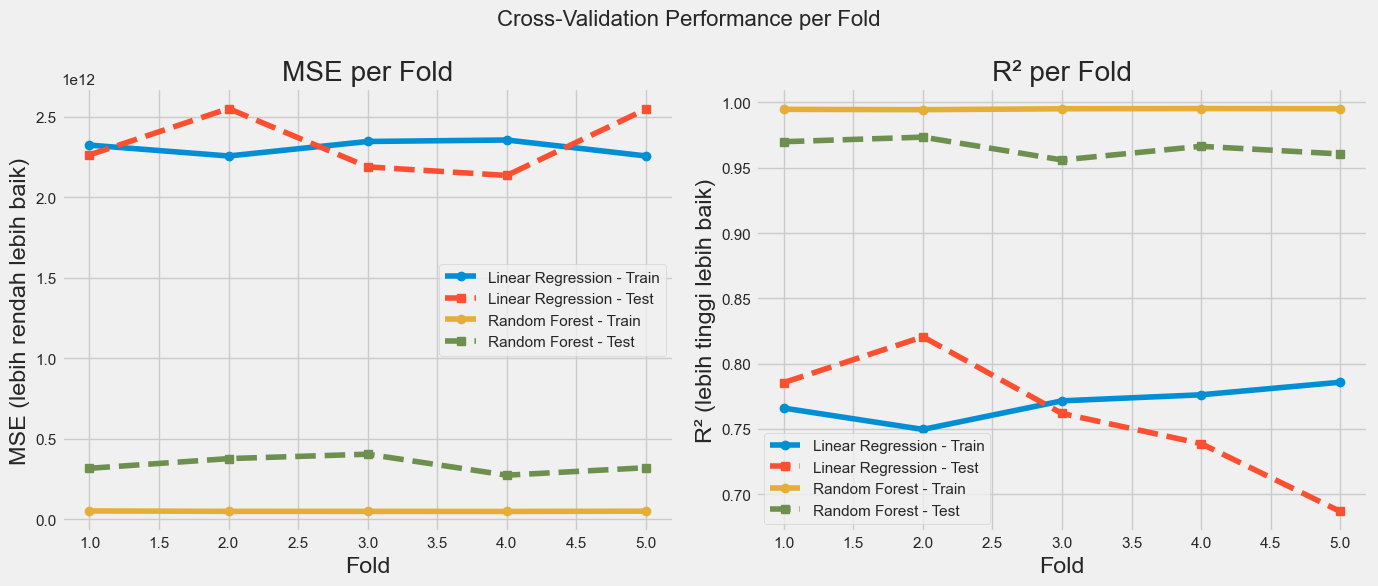

In [59]:
# =======================
# PLOT
# =======================

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# --- MSE Plot ---
for model, df in results_df.groupby("model"):
    axes[0].plot(df["fold"], df["train_mse"], marker="o", label=f"{model} - Train")
    axes[0].plot(df["fold"], df["test_mse"], marker="s", linestyle="--", label=f"{model} - Test")
axes[0].set_title("MSE per Fold")
axes[0].set_xlabel("Fold")
axes[0].set_ylabel("MSE (lebih rendah lebih baik)")
axes[0].legend()
axes[0].grid(True)

# --- R² Plot ---
for model, df in results_df.groupby("model"):
    axes[1].plot(df["fold"], df["train_r2"], marker="o", label=f"{model} - Train")
    axes[1].plot(df["fold"], df["test_r2"], marker="s", linestyle="--", label=f"{model} - Test")
axes[1].set_title("R² per Fold")
axes[1].set_xlabel("Fold")
axes[1].set_ylabel("R² (lebih tinggi lebih baik)")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Cross-Validation Performance per Fold", fontsize=16)
plt.tight_layout()
plt.show()